In [2]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.optimize import curve_fit

In [3]:
path = Path.cwd()
date = "2022-02-22"
datapath = path / (date+'_TK-data')
outputpath = path / 'results'

In [4]:
u = 1.6605 * 1e-27
m85 = 84.91 * u	
m87 = 86.91 * u	 
kB = 1.380649 * 1e-23

In [5]:
def calc_N(V):
    c = 299792458
    h = 6.62607015 *1e-34

    SF = 10 * 1e6/(10*1e6+50) #scale factor
    TG = 2.38 * 1e6 #V/A #Transimpedance gain
    TG_err = 0.05 * TG #5% error
    R = 0.48 #Wellenlänge lambda = 780 nm
    R_err = 0.01

    Delta = 10 * 1e6 #10 MHz detuning
    Gamma0 = 2*np.pi*6.07 *1e6 #2pi * 6.07 MHz natural line width
    Isat = 4.1 *1e-3*1e4 # 4.1 mW/cm^2
    P_pm = 15 * 1e-3 # P_Powermeter = 5 +/- 0.1 mW je Richtung
    P_pm_err = np.sqrt(3)*0.1*1e-3 #siehe oben
    w = 2*1e-3 #waist 2 mmm
    I0 = 2*P_pm/(np.pi*w**2) #Ir \approx I0 Ist das richtig so? oder Faktor 3 daneben?
    I0_err = 2*P_pm_err/(np.pi*w**2)

    theta = (25.4)**2/(4*(150)**2) #according to Praktikumsanleitung
    E = h*c/(780.241*1e-9) #5S1/2 -> 5P3/2 Übergang aprrox 780.241 nm

    Pmeas = V /(R * TG * SF)
    Pmeas_err = np.sqrt((V*R_err/(R**2*TG*SF))**2+(V*TG_err/(R*TG**2*SF))**2)
    Gamma_sc = Gamma0/2 * I0/Isat /(1+I0/Isat+4*Delta**2/Gamma0**2)
    Gamma_sc_err = Gamma0/(2*Isat) * (1+4*Delta**2/Gamma0**2)/(1+I0/Isat*4*Delta**2/Gamma0**2) * I0_err
    Na = Pmeas/(theta*Gamma_sc*E)
    Na_err = np.sqrt((Pmeas_err/(theta*Gamma_sc*E))**2+(Pmeas*Gamma_sc_err/(theta*Gamma_sc**2*E))**2)

    return Na,Na_err

In [6]:
data = pd.read_csv(datapath/(date+"_CAR_background.csv"),header=2,skiprows=[8],sep=';')
Nbg = calc_N(data['HS3-100(17654).Ch2'])[0]
bgmean = np.mean(Nbg)
bgstd = np.std(Nbg)
print(bgmean, bgstd)

910613.5520501804 45115.57820629076


In [7]:
length = 10

## Set 1

Trigger times:

99       0.00495
60177    3.00885
60277    3.01385
Name: Relative time, dtype: float64


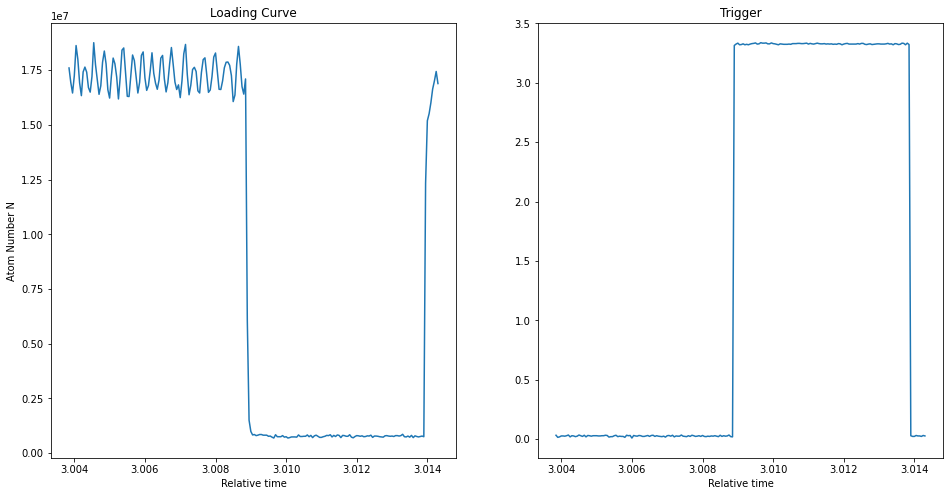

In [26]:
data = pd.read_csv(datapath/(date+"_CAR_5.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][1]-100
stop = data.index[diff > 1][2]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 2

Trigger times:

199      0.00995
64264    3.21320
64464    3.22320
Name: Relative time, dtype: float64


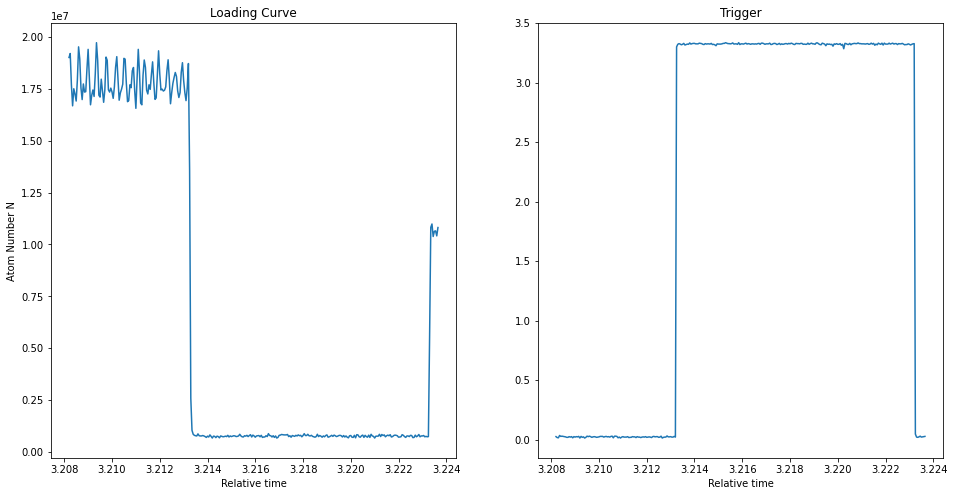

In [27]:
data = pd.read_csv(datapath/(date+"_CAR_10.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][1]-100
stop = data.index[diff > 1][2]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 3

Trigger times:

299      0.01495
64195    3.20975
64495    3.22475
Name: Relative time, dtype: float64


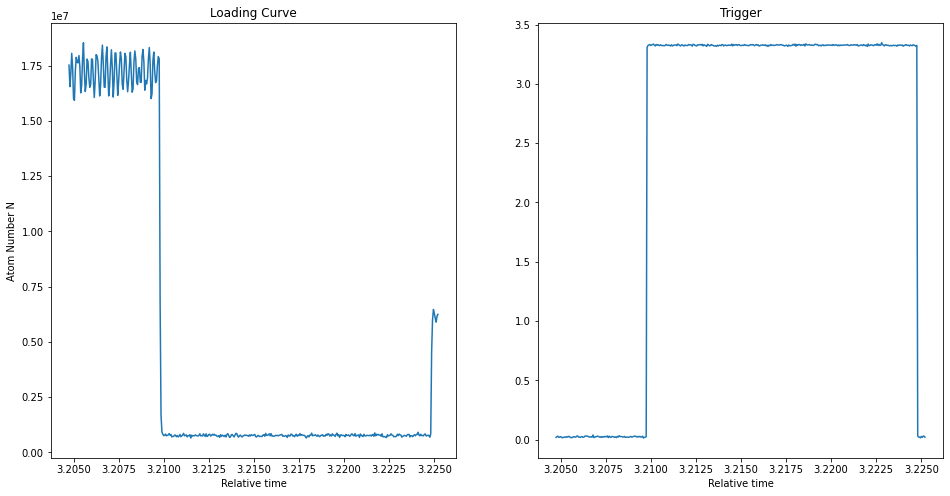

In [28]:
data = pd.read_csv(datapath/(date+"_CAR_15.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][1]-100
stop = data.index[diff > 1][2]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 4

Trigger times:

359      0.01795
64234    3.21170
64594    3.22970
Name: Relative time, dtype: float64


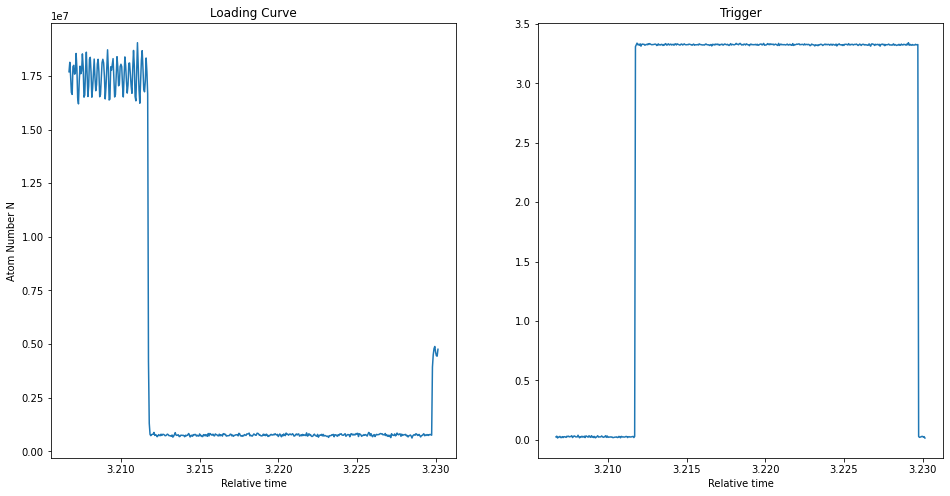

In [29]:
data = pd.read_csv(datapath/(date+"_CAR_18.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][1]-100
stop = data.index[diff > 1][2]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 5

Trigger times:

399      0.01995
64133    3.20665
64533    3.22665
Name: Relative time, dtype: float64


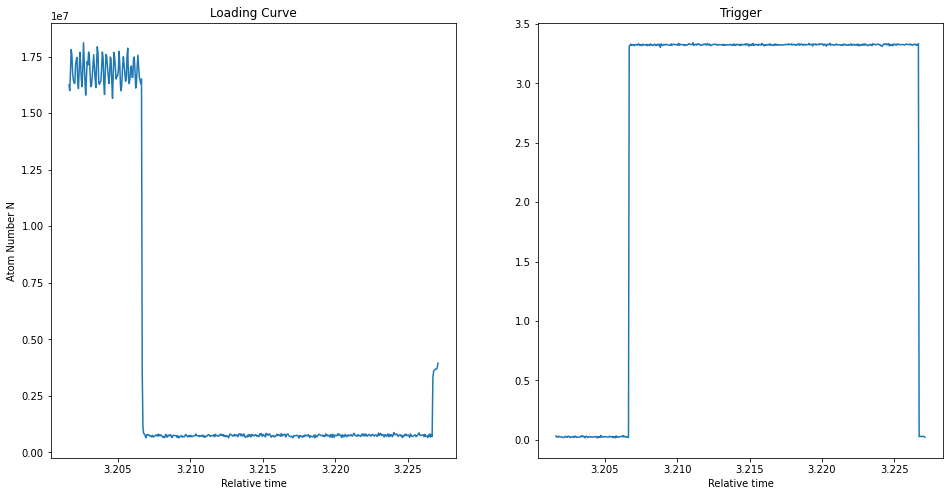

In [30]:
data = pd.read_csv(datapath/(date+"_CAR_20.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][1]-100
stop = data.index[diff > 1][2]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 6

Trigger times:

9999     -0.0002
10124     0.0248
76068    13.2136
76193    13.2386
Name: Relative time, dtype: float64


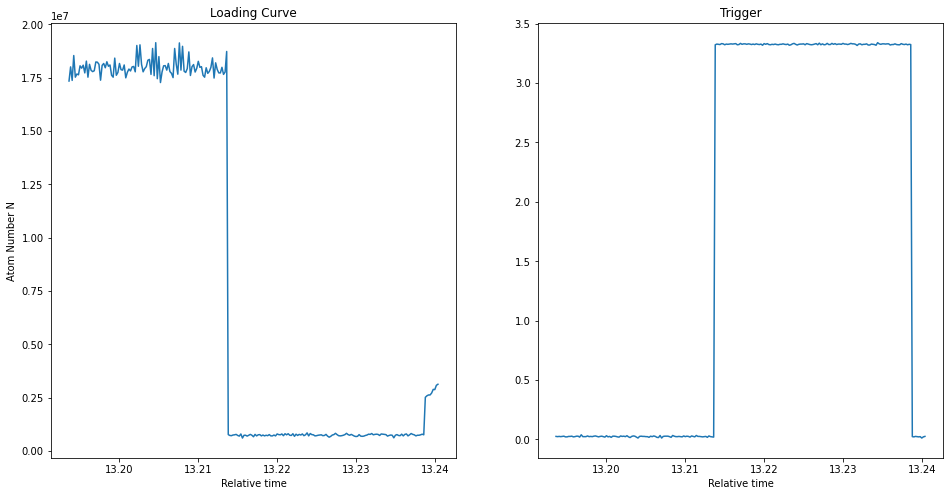

In [31]:
data = pd.read_csv(datapath/(date+"_CAR_25.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][2]-100
stop = data.index[diff > 1][3]+10
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 7

Trigger times:

9999     -0.0002
10149     0.0298
76211    13.2422
76361    13.2722
Name: Relative time, dtype: float64


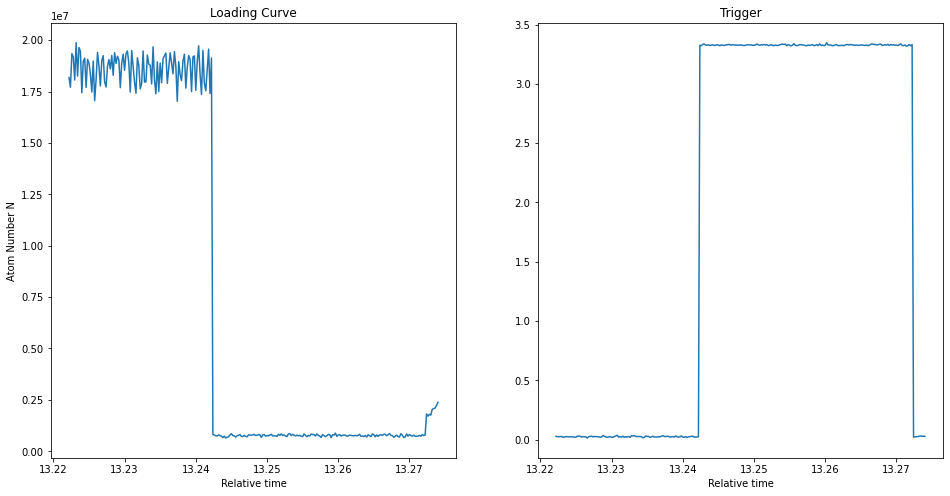

In [32]:
data = pd.read_csv(datapath/(date+"_CAR_30.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 8

Trigger times:

9999     -0.0002
10174     0.0348
76082    13.2164
76257    13.2514
Name: Relative time, dtype: float64


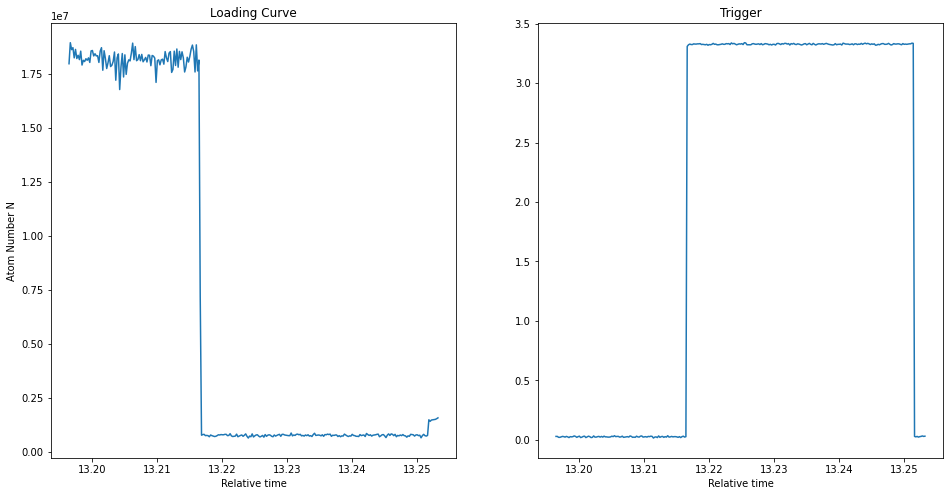

In [36]:
data = pd.read_csv(datapath/(date+"_CAR_35.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 9

Trigger times:

9999     -0.0002
10199     0.0398
76192    13.2384
76392    13.2784
Name: Relative time, dtype: float64


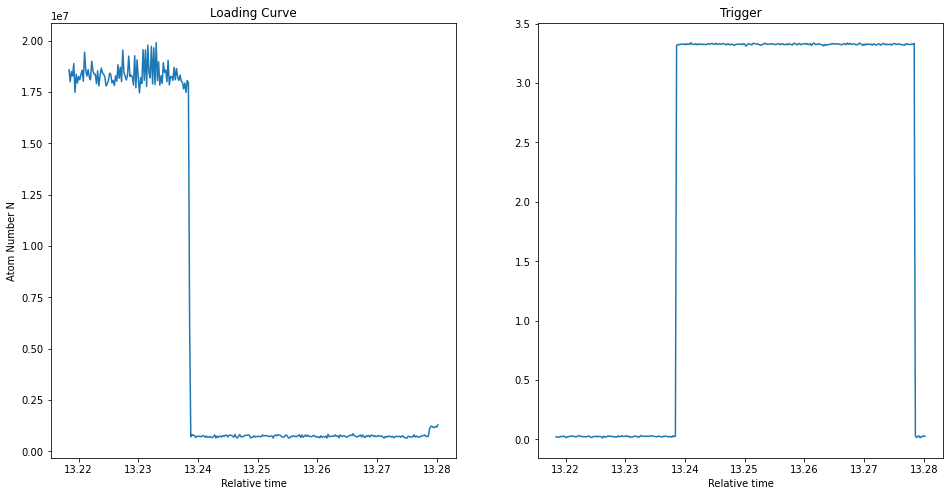

In [34]:
data = pd.read_csv(datapath/(date+"_CAR_40.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 10

Trigger times:

9999     -0.0002
10214     0.0428
76088    13.2176
76303    13.2606
Name: Relative time, dtype: float64


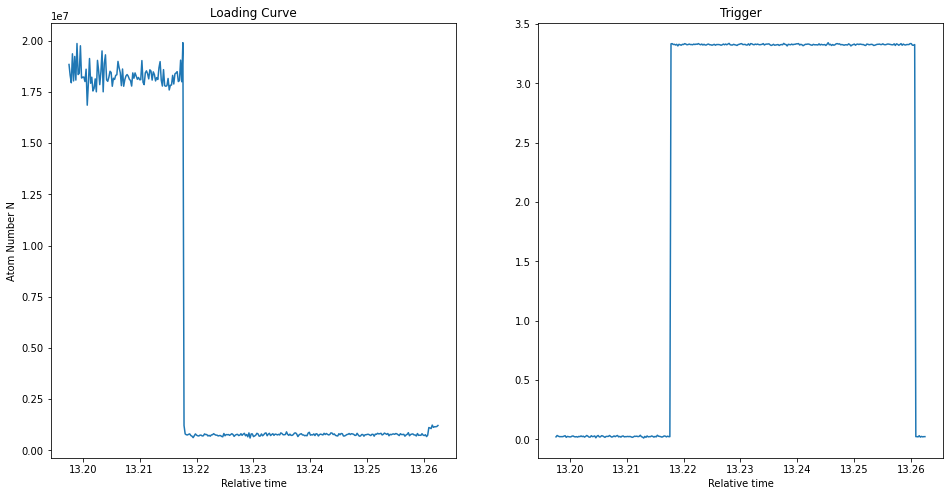

In [43]:
data = pd.read_csv(datapath/(date+"_CAR_43.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 11

Trigger times:

9999     -0.0002
10224     0.0448
76075    13.2150
76300    13.2600
Name: Relative time, dtype: float64


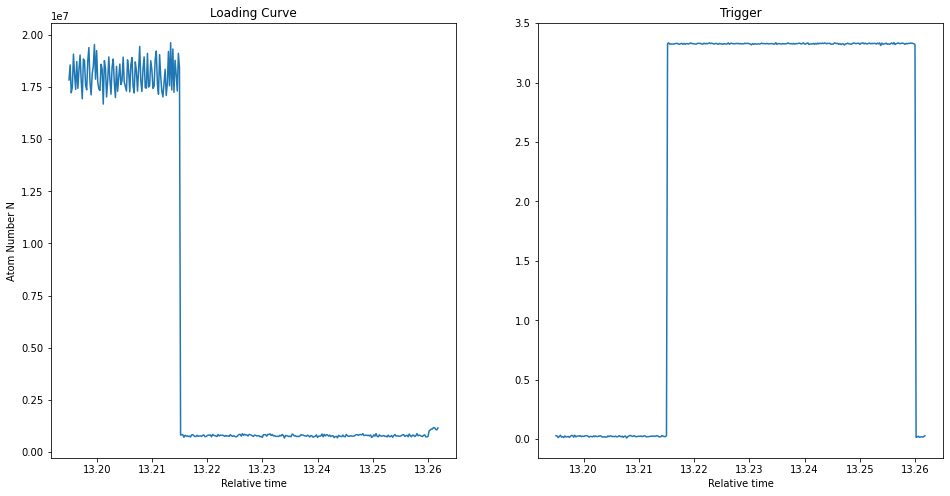

In [38]:
data = pd.read_csv(datapath/(date+"_CAR_45.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 12

Trigger times:

9999     -0.0002
10239     0.0478
76078    13.2156
76318    13.2636
Name: Relative time, dtype: float64


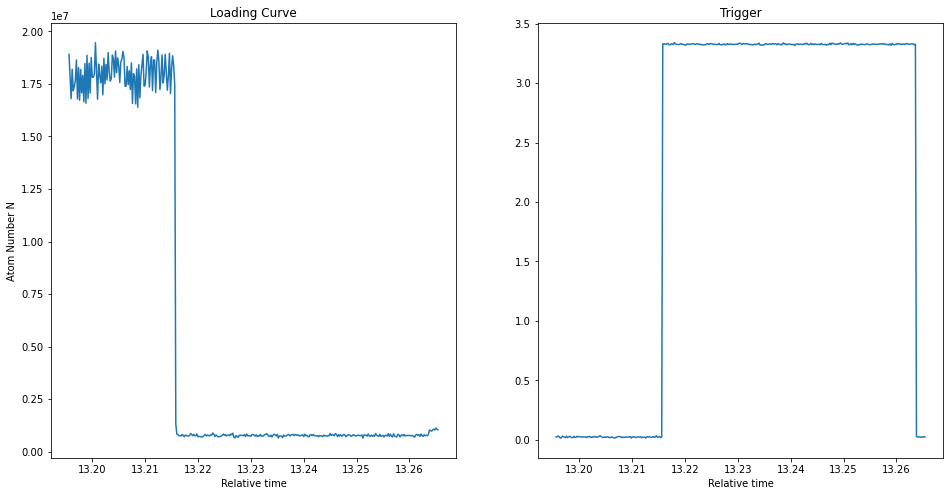

In [44]:
data = pd.read_csv(datapath/(date+"_CAR_48.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 13

Trigger times:

9999     -0.0002
10249     0.0498
76070    13.2140
76320    13.2640
Name: Relative time, dtype: float64


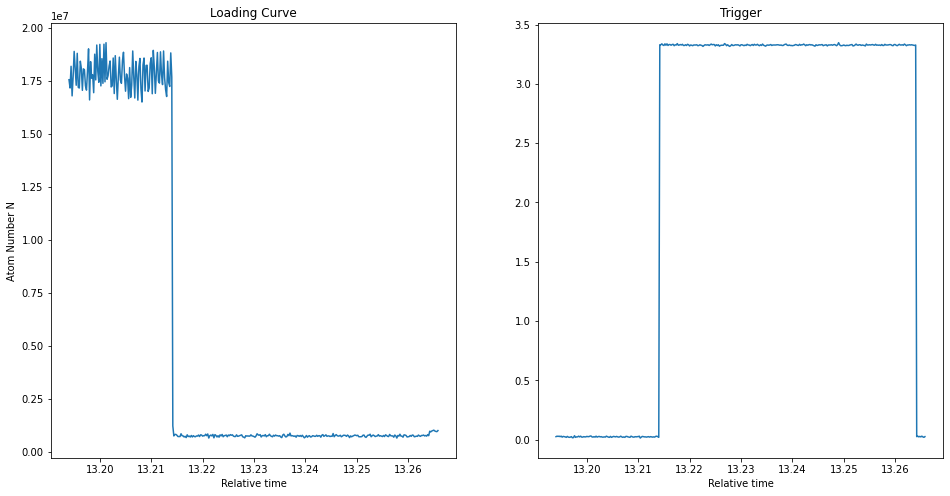

In [45]:
data = pd.read_csv(datapath/(date+"_CAR_50.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 14

Trigger times:

9999     -0.0002
10264     0.0528
82627    14.5254
82892    14.5784
Name: Relative time, dtype: float64


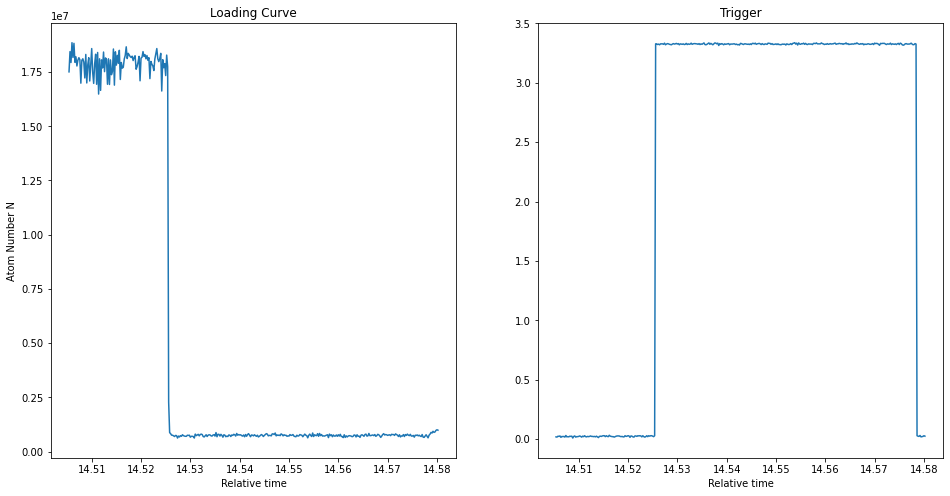

In [10]:
data = pd.read_csv(datapath/(date+"_CAR_53.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 15

Trigger times:

9999     -0.0002
10274     0.0548
76100    13.2200
76375    13.2750
Name: Relative time, dtype: float64


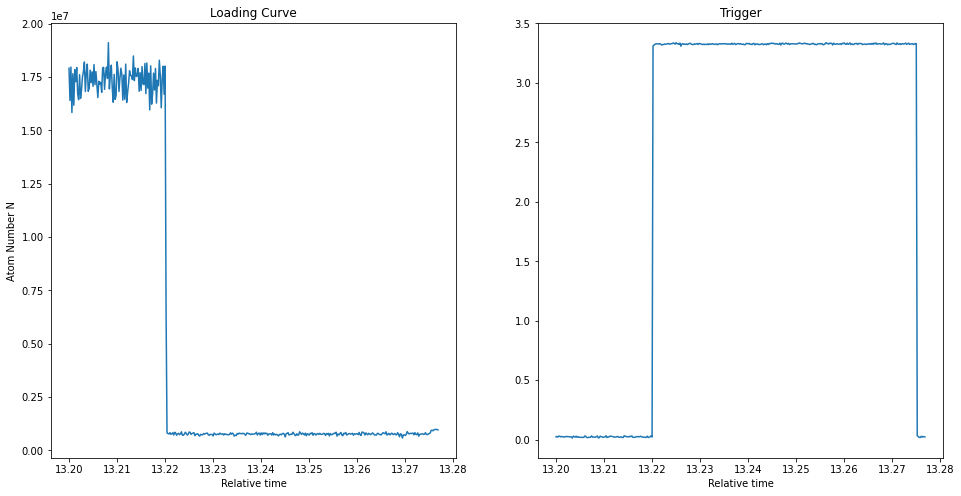

In [11]:
data = pd.read_csv(datapath/(date+"_CAR_55.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 16

Trigger times:

9999     -0.0002
10289     0.0578
76129    13.2258
76419    13.2838
Name: Relative time, dtype: float64


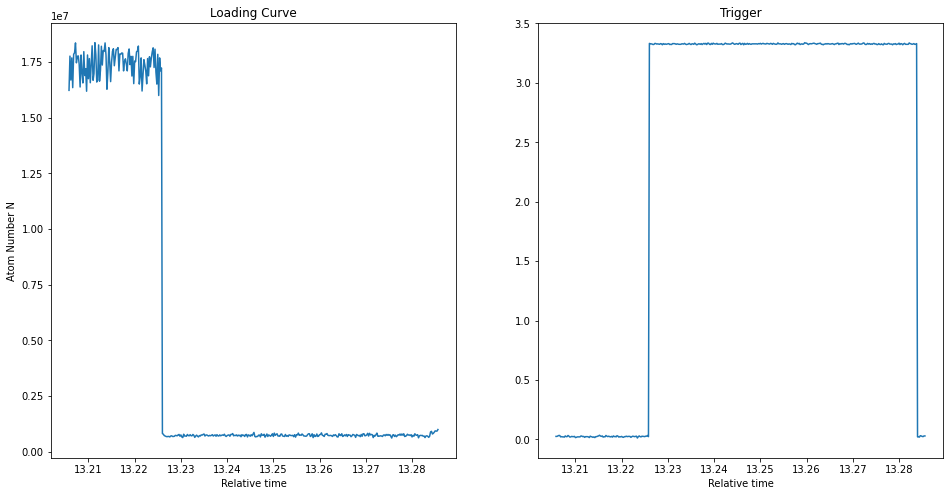

In [12]:
data = pd.read_csv(datapath/(date+"_CAR_58.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 17

Trigger times:

9999     -0.0002
10299     0.0598
76086    13.2172
76386    13.2772
Name: Relative time, dtype: float64


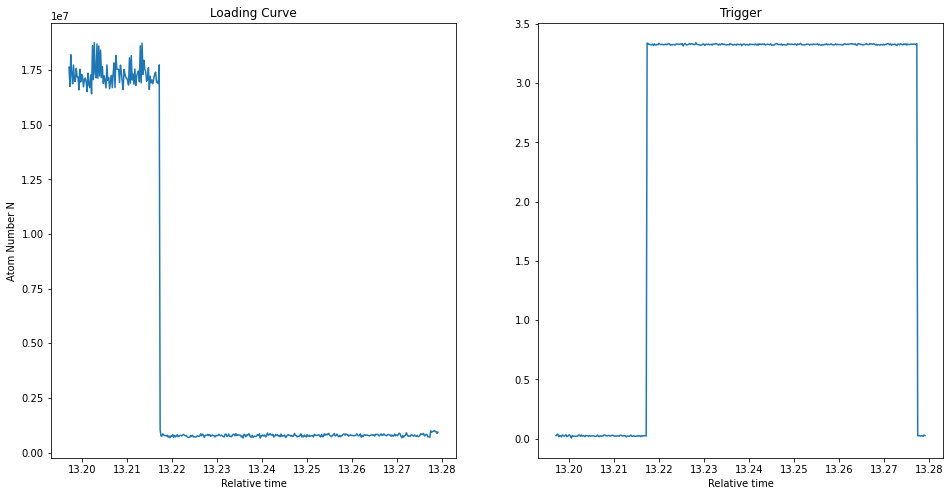

In [15]:
data = pd.read_csv(datapath/(date+"_CAR_60.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 18

Trigger times:

9999     -0.0002
10314     0.0628
76199    13.2398
76514    13.3028
Name: Relative time, dtype: float64


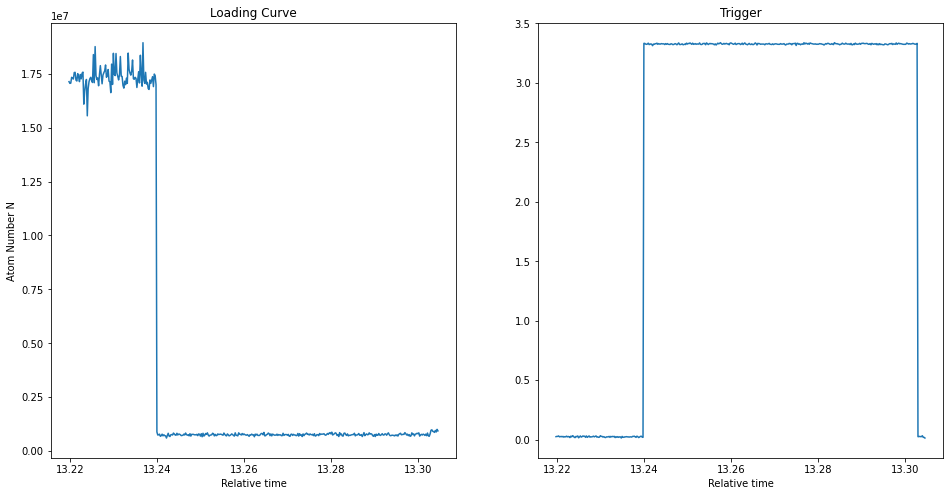

In [18]:
data = pd.read_csv(datapath/(date+"_CAR_63.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 19

Trigger times:

9999     -0.0002
10324     0.0648
76083    13.2166
76408    13.2816
Name: Relative time, dtype: float64


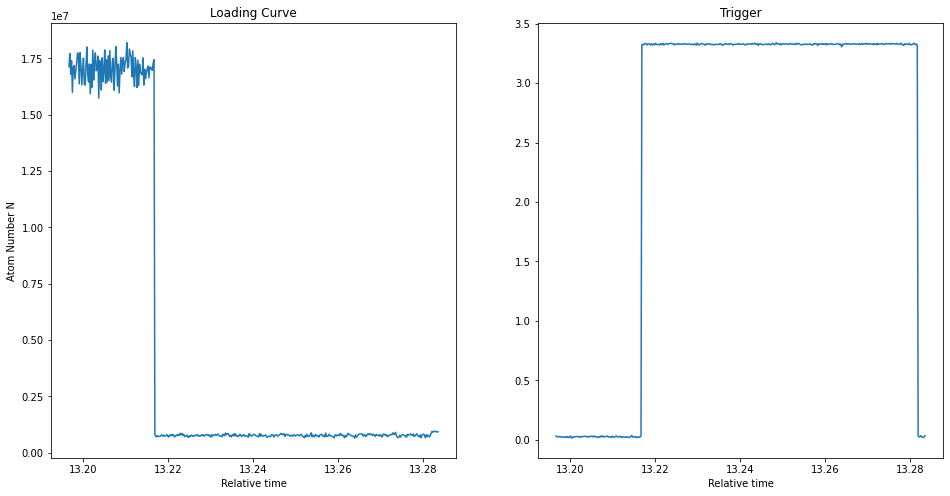

In [19]:
data = pd.read_csv(datapath/(date+"_CAR_65.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 20

Trigger times:

9999     -0.0002
10339     0.0678
76073    13.2146
76413    13.2826
Name: Relative time, dtype: float64


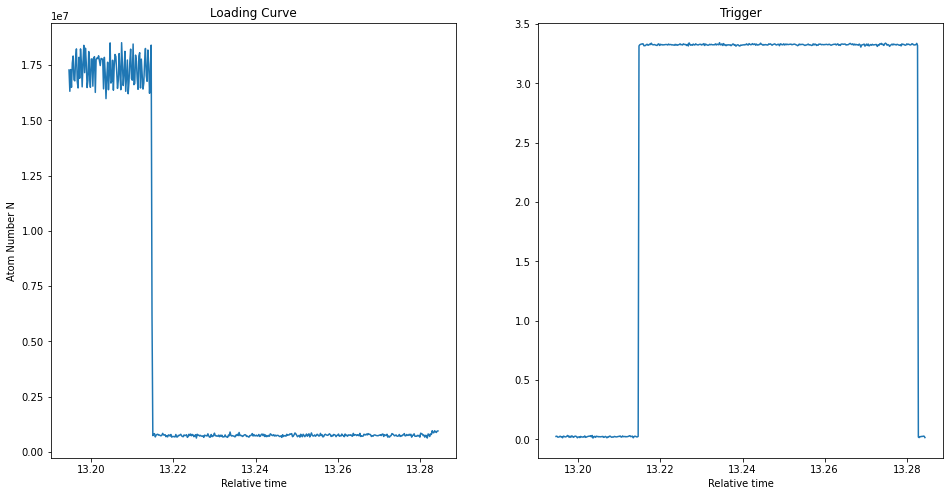

In [20]:
data = pd.read_csv(datapath/(date+"_CAR_68.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 21

Trigger times:

9999     -0.0002
10349     0.0698
76102    13.2204
76452    13.2904
Name: Relative time, dtype: float64


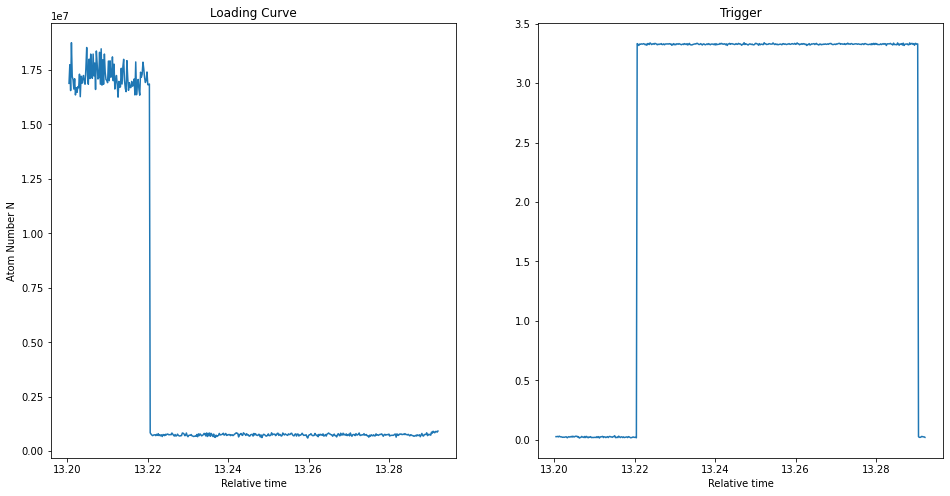

In [21]:
data = pd.read_csv(datapath/(date+"_CAR_70.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 22

Trigger times:

9999     -0.0002
10364     0.0728
76102    13.2204
76467    13.2934
Name: Relative time, dtype: float64


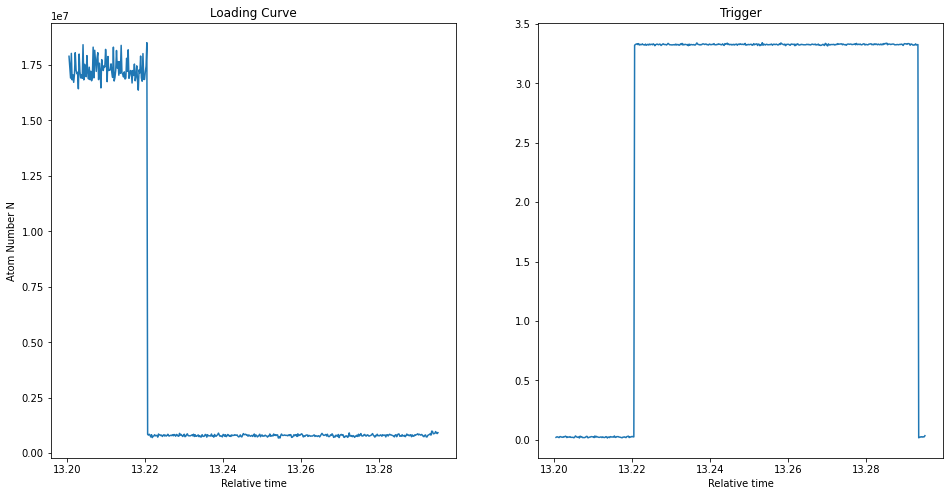

In [22]:
data = pd.read_csv(datapath/(date+"_CAR_73.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 23

Trigger times:

9999     -0.0002
10374     0.0748
76097    13.2194
76472    13.2944
Name: Relative time, dtype: float64


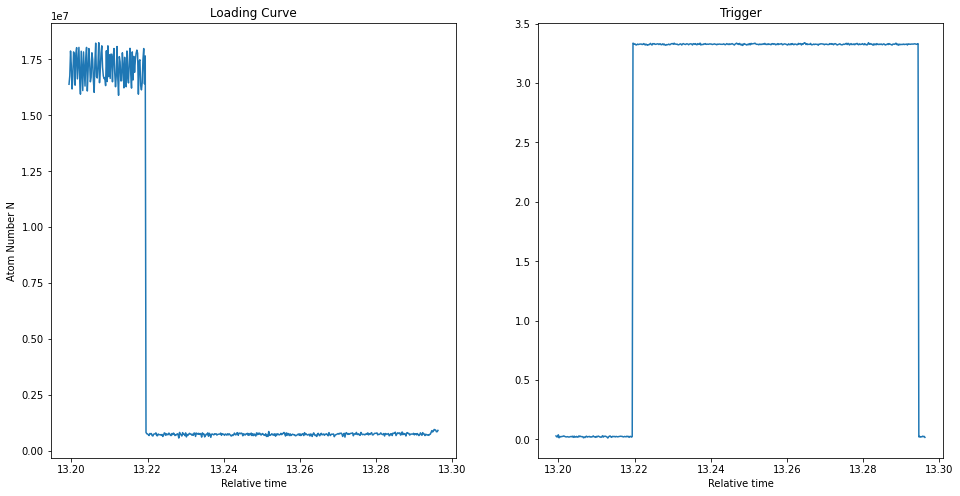

In [25]:
data = pd.read_csv(datapath/(date+"_CAR_75.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 24

Trigger times:

9999     -0.0002
10399     0.0798
76081    13.2162
76481    13.2962
Name: Relative time, dtype: float64


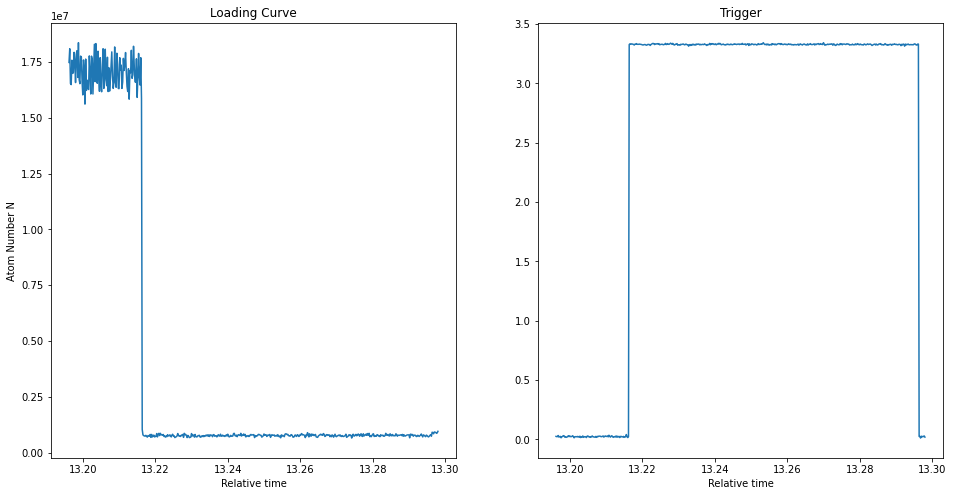

In [26]:
data = pd.read_csv(datapath/(date+"_CAR_80.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 25

Trigger times:

9999     -0.0002
10424     0.0848
76052    13.2104
76476    13.2952
Name: Relative time, dtype: float64


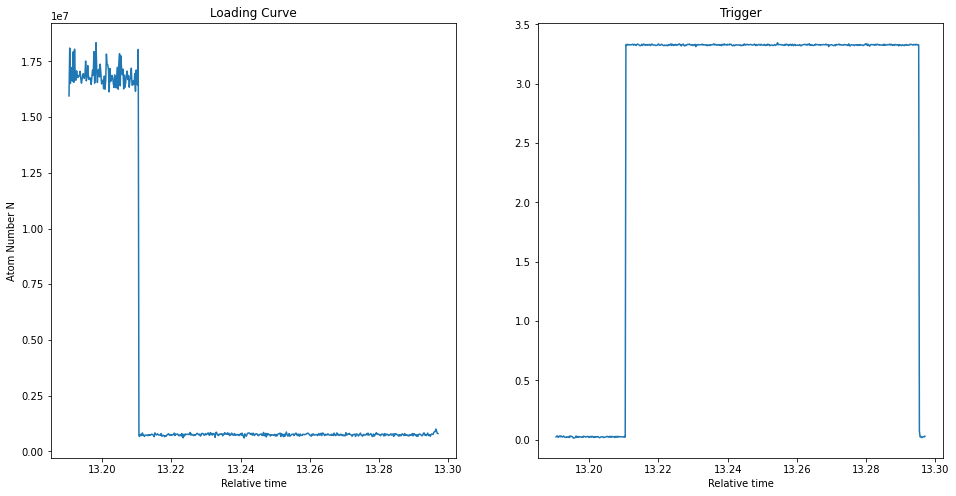

In [27]:
data = pd.read_csv(datapath/(date+"_CAR_85.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 26

Trigger times:

9999     -0.0002
10449     0.0898
76156    13.2312
76605    13.3210
Name: Relative time, dtype: float64


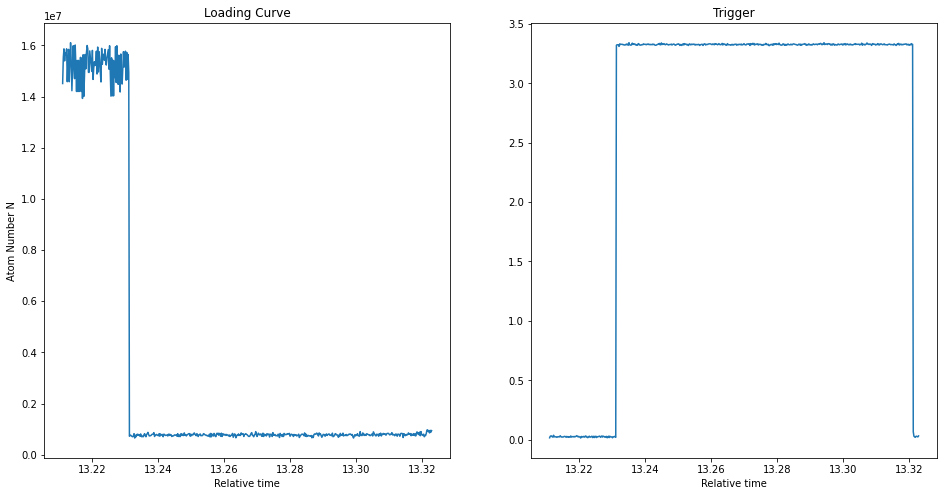

In [28]:
data = pd.read_csv(datapath/(date+"_CAR_90.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 27

Trigger times:

9999     -0.0002
10499     0.0998
76108    13.2216
76608    13.3216
Name: Relative time, dtype: float64


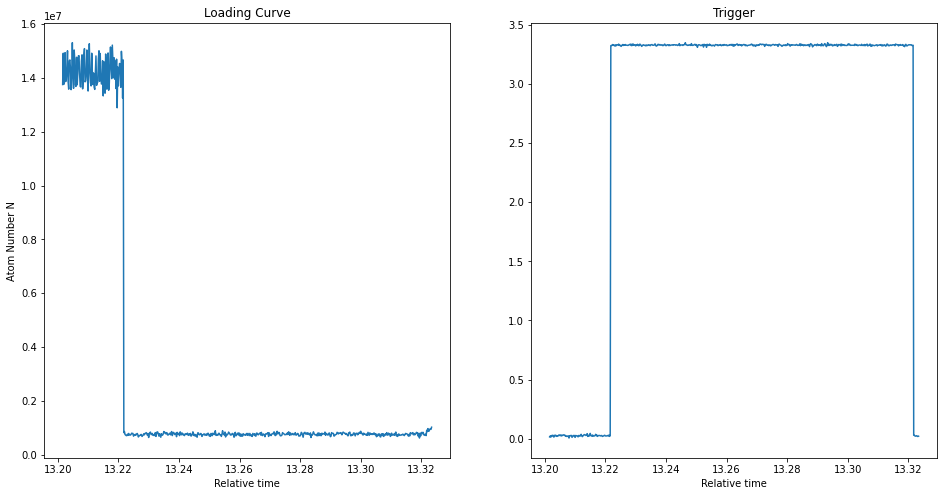

In [29]:
data = pd.read_csv(datapath/(date+"_CAR_100.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 28

Trigger times:

9999     -0.0002
10749     0.1498
76110    13.2220
76860    13.3720
Name: Relative time, dtype: float64


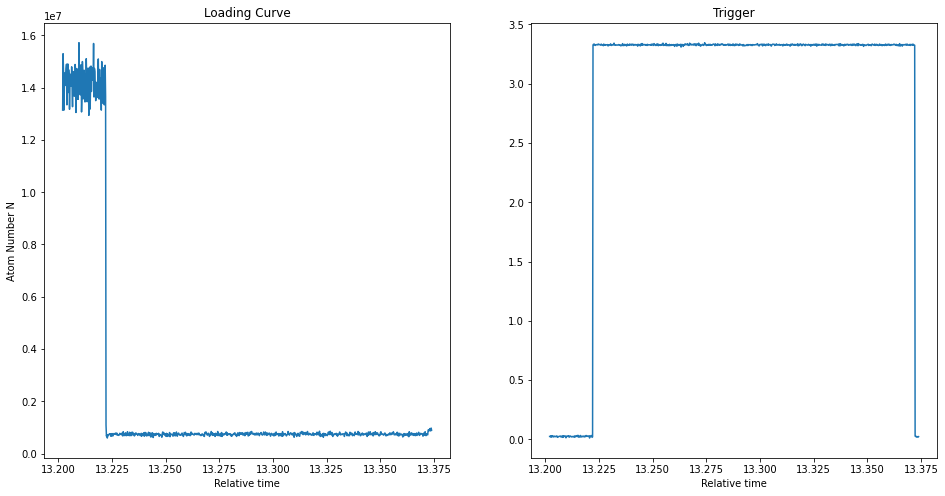

In [30]:
data = pd.read_csv(datapath/(date+"_CAR_150.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 29

Trigger times:

9999     -0.0002
10999     0.1998
76110    13.2220
77110    13.4220
Name: Relative time, dtype: float64


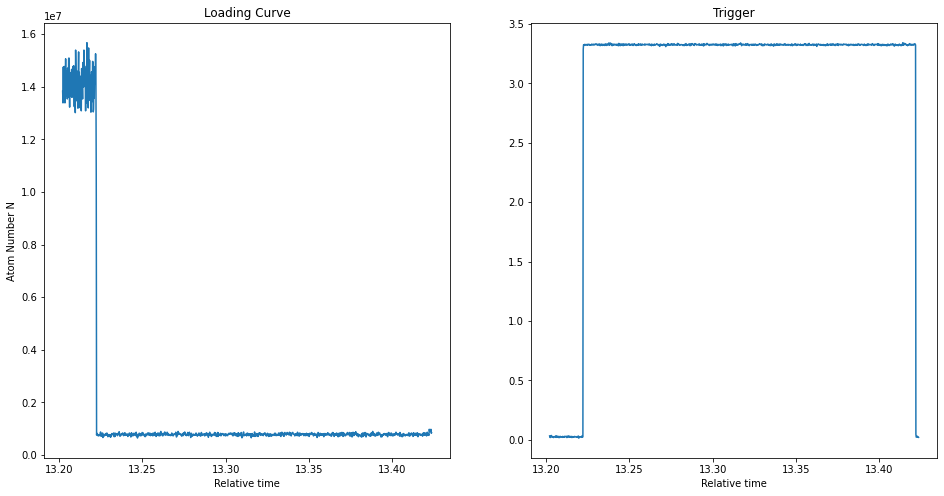

In [31]:
data = pd.read_csv(datapath/(date+"_CAR_200.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 30

Trigger times:

9999     -0.0002
11249     0.2498
77146    13.4292
78396    13.6792
Name: Relative time, dtype: float64


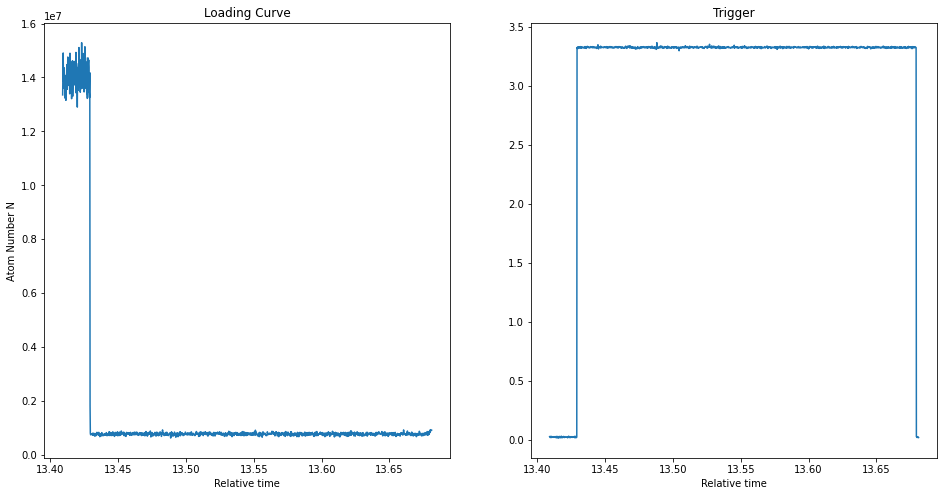

In [32]:
data = pd.read_csv(datapath/(date+"_CAR_250.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 31

Trigger times:

9999     -0.0002
11499     0.2998
77087    13.4174
78587    13.7174
Name: Relative time, dtype: float64


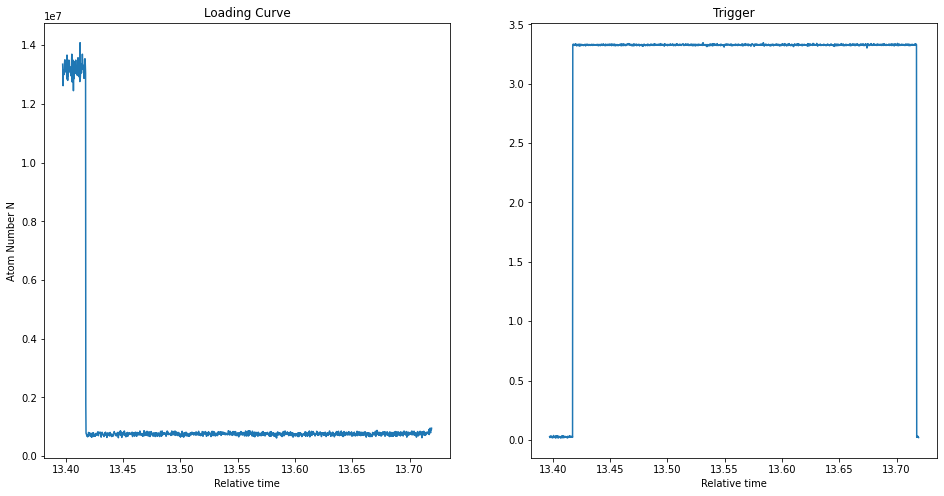

In [37]:
data = pd.read_csv(datapath/(date+"_CAR_300.csv"),header=2,skiprows=[8],sep=';')
Na = calc_N(data['HS3-100(17654).Ch2'])[0]
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][-2]-100
stop = data.index[diff > 1][-1]+length
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],Na[start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Atom Number N')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()